In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SIZE = 10
img = np.random.rand(SIZE, SIZE) ** 5

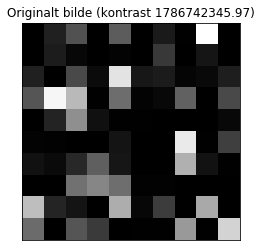

In [3]:
plt.imshow(img, plt.cm.gray)
plt.title("Originalt bilde (kontrast %.2f)" % (img.max() / img.min()))
plt.xticks([])
plt.yticks([])
print()

In [4]:
N = 8

dT = np.arange(1, N + 1)
exs = np.array([(img * dt * 255).clip(0, 255).astype(np.uint8) for dt in dT])

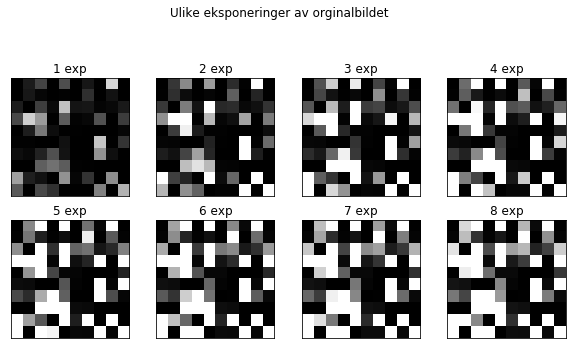

In [5]:
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.suptitle("Ulike eksponeringer av orginalbildet")

for i, (dt, imge) in enumerate(zip(dT, exs)):
    ax = fig.add_subplot(N // 2, (N + 1) // 2, i + 1, xticks=[], yticks=[])
    ax.imshow(imge, plt.cm.gray, vmin=0, vmax=255)
    ax.set_title('%d exp' % dt)

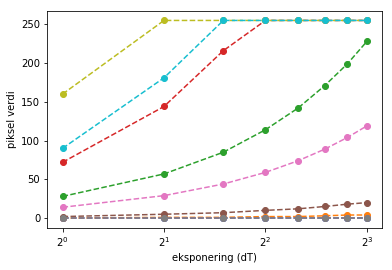

In [6]:
plt.xlabel('eksponering (dT)')
plt.ylabel('piksel verdi')
plt.xscale('log', basex=2)

for eksps in exs.reshape(N, -1).T[::(exs.shape[1] * exs.shape[2]) // 10]:
    plt.plot(dT, eksps, 'o--')

In [7]:
from hdrie import rekonstruksjon

p, lE = rekonstruksjon.debevec_maliks(exs, dT, 15, 256)

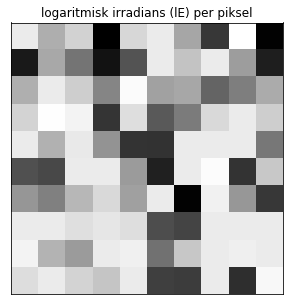

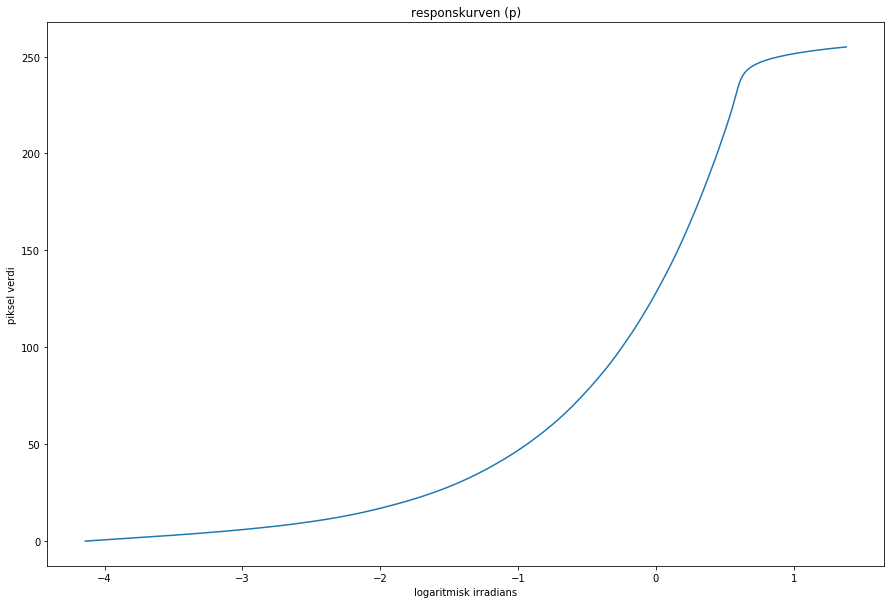

In [8]:
fig_irr = plt.figure(figsize=(5, 5))  # figure size in inches
ax_irr = fig_irr.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax_irr.imshow(lE, plt.cm.gray)
ax_irr.set_title('logaritmisk irradians (lE) per piksel')

fig_p = plt.figure(figsize=(15,10))
ax_p = fig_p.add_subplot(1, 1, 1)
ax_p.set_title('responskurven (p)')
ax_p.set_ylabel('piksel verdi')
ax_p.set_xlabel('logaritmisk irradians')
ax_p.plot(p, np.arange(256))

-5.938257856541964 0.514753300011709
4.726401115953417e-10 0.8444861017930471
0.0 1.0
0.0 1.0


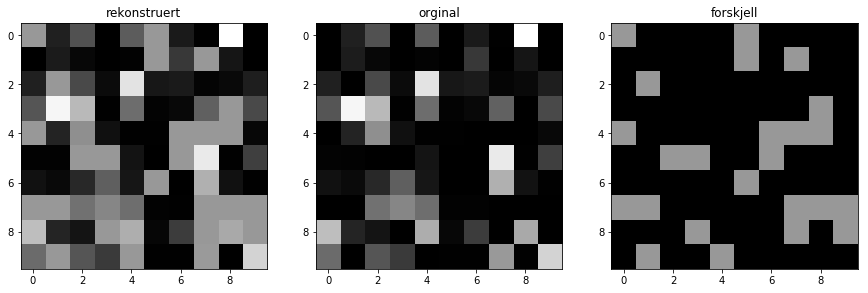

In [9]:
print(lE.min(), lE.max())
print(img.min(), img.max())

kons = np.exp(lE)
kons = kons - kons.min()
kons = kons / kons.max()

expt = img - img.min()
expt = expt / expt.max()

print(kons.min(), kons.max())
print(expt.min(), expt.max())

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].set_title('rekonstruert')
axs[0].imshow(kons, plt.cm.gray, vmin=0, vmax=1)
axs[1].set_title('orginal')
axs[1].imshow(expt, plt.cm.gray, vmin=0, vmax=1)
axs[2].set_title('forskjell')
axs[2].imshow(np.abs(kons - expt), plt.cm.gray, vmin=0, vmax=1)